---
---
### UNaB: Universidad Nacional Guillermo Brown
#### Inferencia estadística y reconocimiento de patrones
#### Parcial N°1 - 22/10/2024
##### Prof: Sebastian Simondi
# Alumnos : Lucas León González - David Lobos - Euler Diego

----
----

## Actividades

1. Aplicar todos los algoritmos de clasificación estudiados.
2. Calcular sus métricas y matrices de confusión.
3. Determinar si existe uno que sea mucho mejor que los demás.



-----
 # Desentrañando los Secretos del Vino



 -----
El dataset 'calidadvino.csv' consta de 1599 entradas, cada una representando diferentes muestras de vino, y contiene 12 columnas que describen diversas propiedades químicas y físicas fundamentales en la producción y calidad del vino.

 #### Las columnas incluyen información sobre:

* Índice   
* Ácido tartárico
* Densidad de uva
* Ácido cítrico
* Azúcar residual
* Cloruro de sodio
* Dióxido de azufre libre
* Dióxido de azufre combinado
* Densidad de alcohol
* Niveles de pH
* Cloruro de potasio
* Contenido de alcohol

Estas características son esenciales para entender cómo cada factor contribuye al perfil del vino, su sabor y su calidad.
La importancia de este análisis radica en que permite a los productores de vino, enólogos e investigadores comprender mejor las relaciones entre estos compuestos y cómo afectan el producto final. A través de este estudio, podemos identificar patrones y tendencias que podrían influir en el proceso de producción y en la evaluación sensorial del vino.















----
----


###            Ingesta y limpieza de datos

---



---

In [1]:
# IMPORTAR LAS LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




In [2]:
# Configuración de estilo
sns.set(style='whitegrid')

In [3]:
# CARGAR LOS DATOS EN EL DATAFRAME
df = pd.read_csv('calidadvino.csv')
df

,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [4]:
df.head()


,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   Tartaric Acid         1599 non-null   float64
 2   Grape Density         1599 non-null   float64
 3   Citric Acid           1599 non-null   float64
 4   Residual.sugar        1599 non-null   float64
 5   Sodium chloride       1599 non-null   float64
 6   Free.sulfur.dioxide   1599 non-null   float64
 7   Bound.sulfur.dioxide  1599 non-null   float64
 8   Alcohol Density       1599 non-null   float64
 9   PH Levels             1599 non-null   float64
 10  Potassium chloride    1599 non-null   float64
 11  Alcohol Content       1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Las ultimas 5 filas exploracion
df.tail()

,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
1598,1599,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0


In [7]:
# REVISAR LOS TIPOS DE DATOS
df.dtypes

Unnamed: 0                int64
Tartaric Acid           float64
Grape Density           float64
Citric Acid             float64
Residual.sugar          float64
Sodium chloride         float64
Free.sulfur.dioxide     float64
Bound.sulfur.dioxide    float64
Alcohol Density         float64
PH Levels               float64
Potassium chloride      float64
Alcohol Content         float64
dtype: object

In [8]:
# Eliminar los duplicados
print(f'Original: {df.count()} filas') #conteo de duplicados
duplicate_rows_df =df[df.duplicated()] # genero un set de datos con todos los datos que hay duplicados
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.count()}')  #deteco que el ID esta repetido en 18 casos

# Eliminar los duplicados
df = df.drop_duplicates()

Original: Unnamed: 0              1599
Tartaric Acid           1599
Grape Density           1599
Citric Acid             1599
Residual.sugar          1599
Sodium chloride         1599
Free.sulfur.dioxide     1599
Bound.sulfur.dioxide    1599
Alcohol Density         1599
PH Levels               1599
Potassium chloride      1599
Alcohol Content         1599
dtype: int64 filas
Cantidad de filas duplicadas: Unnamed: 0              0
Tartaric Acid           0
Grape Density           0
Citric Acid             0
Residual.sugar          0
Sodium chloride         0
Free.sulfur.dioxide     0
Bound.sulfur.dioxide    0
Alcohol Density         0
PH Levels               0
Potassium chloride      0
Alcohol Content         0
dtype: int64


In [9]:
#Conteo Filas despues de eliminar los duplicados
print(f'Original: {df.count()} filas')

Original: Unnamed: 0              1599
Tartaric Acid           1599
Grape Density           1599
Citric Acid             1599
Residual.sugar          1599
Sodium chloride         1599
Free.sulfur.dioxide     1599
Bound.sulfur.dioxide    1599
Alcohol Density         1599
PH Levels               1599
Potassium chloride      1599
Alcohol Content         1599
dtype: int64 filas


In [10]:
# ELIMINAR LOS VALORES PERDIDOS O NULOS  sin datos
#Encontrar los valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())

Unnamed: 0              0
Tartaric Acid           0
Grape Density           0
Citric Acid             0
Residual.sugar          0
Sodium chloride         0
Free.sulfur.dioxide     0
Bound.sulfur.dioxide    0
Alcohol Density         0
PH Levels               0
Potassium chloride      0
Alcohol Content         0
dtype: int64

Unnamed: 0              0
Tartaric Acid           0
Grape Density           0
Citric Acid             0
Residual.sugar          0
Sodium chloride         0
Free.sulfur.dioxide     0
Bound.sulfur.dioxide    0
Alcohol Density         0
PH Levels               0
Potassium chloride      0
Alcohol Content         0
dtype: int64


In [11]:
# Renombrar las columnas al español
df = df.rename(columns={
    'Unnamed: 0': 'Índice',
    'Tartaric Acid': 'Ácido Tartárico',
    'Grape Density': 'Densidad de Uva',
    'Citric Acid': 'Ácido Cítrico',
    'Residual.sugar': 'Azúcar Residual',
    'Sodium chloride': 'Cloruro de Sodio',
    'Free.sulfur.dioxide': 'Dióxido de Azufre Libre',
    'Bound.sulfur.dioxide': 'Dióxido de Azufre Combinado',
    'Alcohol Density': 'Densidad de Alcohol',
    'PH Levels': 'Niveles de PH',
    'Potassium chloride': 'Cloruro de Potasio',
    'Alcohol Content': 'Contenido de Alcohol'
})

# Mostrar las primeras filas del dataframe para confirmar
print(df.head())

   Índice  Ácido Tartárico  Densidad de Uva  Ácido Cítrico  Azúcar Residual  \
0       1              7.4             0.70           0.00              1.9   
1       2              7.8             0.88           0.00              2.6   
2       3              7.8             0.76           0.04              2.3   
3       4             11.2             0.28           0.56              1.9   
4       5              7.4             0.70           0.00              1.9   

   Cloruro de Sodio  Dióxido de Azufre Libre  Dióxido de Azufre Combinado  \
0             0.076                     11.0                         34.0   
1             0.098                     25.0                         67.0   
2             0.092                     15.0                         54.0   
3             0.075                     17.0                         60.0   
4             0.076                     11.0                         34.0   

   Densidad de Alcohol  Niveles de PH  Cloruro de Potasio  \
0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Índice                       1599 non-null   int64  
 1   Ácido Tartárico              1599 non-null   float64
 2   Densidad de Uva              1599 non-null   float64
 3   Ácido Cítrico                1599 non-null   float64
 4   Azúcar Residual              1599 non-null   float64
 5   Cloruro de Sodio             1599 non-null   float64
 6   Dióxido de Azufre Libre      1599 non-null   float64
 7   Dióxido de Azufre Combinado  1599 non-null   float64
 8   Densidad de Alcohol          1599 non-null   float64
 9   Niveles de PH                1599 non-null   float64
 10  Cloruro de Potasio           1599 non-null   float64
 11  Contenido de Alcohol         1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df

,Índice,Ácido Tartárico,Densidad de Uva,Ácido Cítrico,Azúcar Residual,Cloruro de Sodio,Dióxido de Azufre Libre,Dióxido de Azufre Combinado,Densidad de Alcohol,Niveles de PH,Cloruro de Potasio,Contenido de Alcohol
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


----
----
### Análisis Exploratorio de Datos (EDA)
----

## Análisis Estadístico Descriptivo de las Características Químicas del Vino

      Ácido Tartárico  Densidad de Uva  Ácido Cítrico  Azúcar Residual  \
mean         8.319637         0.527821       0.270976         2.538806   
std          1.741096         0.179060       0.194801         1.409928   
min          4.600000         0.120000       0.000000         0.900000   
max         15.900000         1.580000       1.000000        15.500000   

      Cloruro de Sodio  Dióxido de Azufre Libre  Dióxido de Azufre Combinado  \
mean          0.087467                15.874922                    46.467792   
std           0.047065                10.460157                    32.895324   
min           0.012000                 1.000000                     6.000000   
max           0.611000                72.000000                   289.000000   

      Densidad de Alcohol  Niveles de PH  Cloruro de Potasio  \
mean             0.996747       3.311113            0.658149   
std              0.001887       0.154386            0.169507   
min              0.990070       2.74

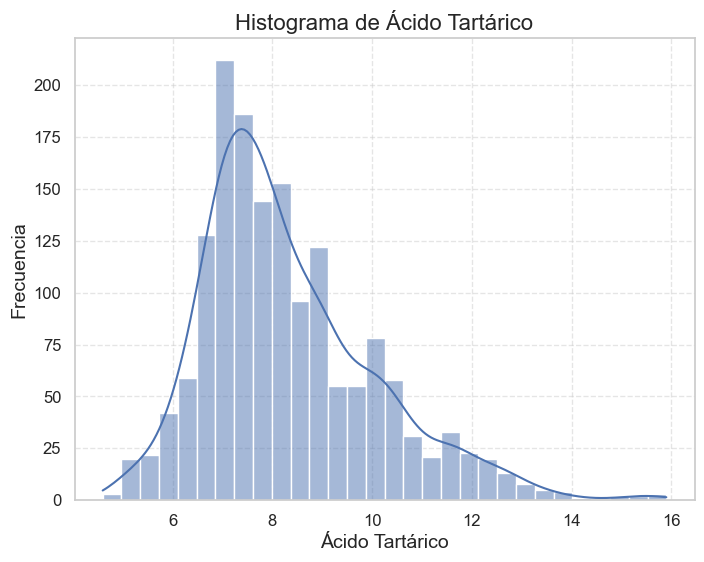

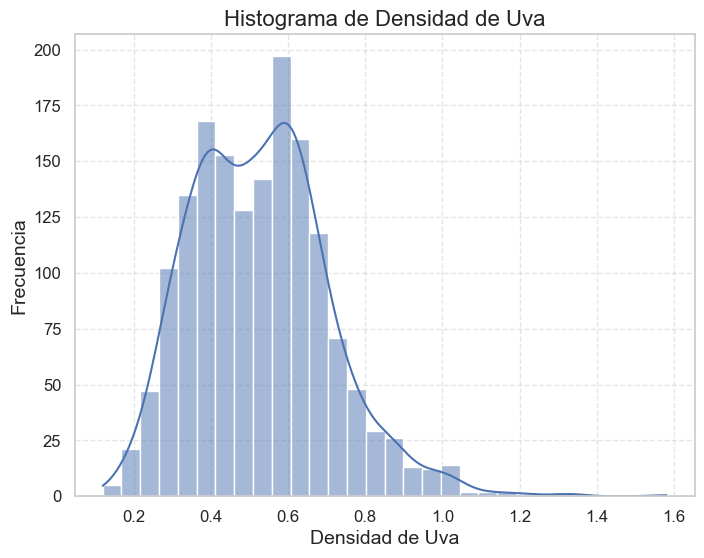

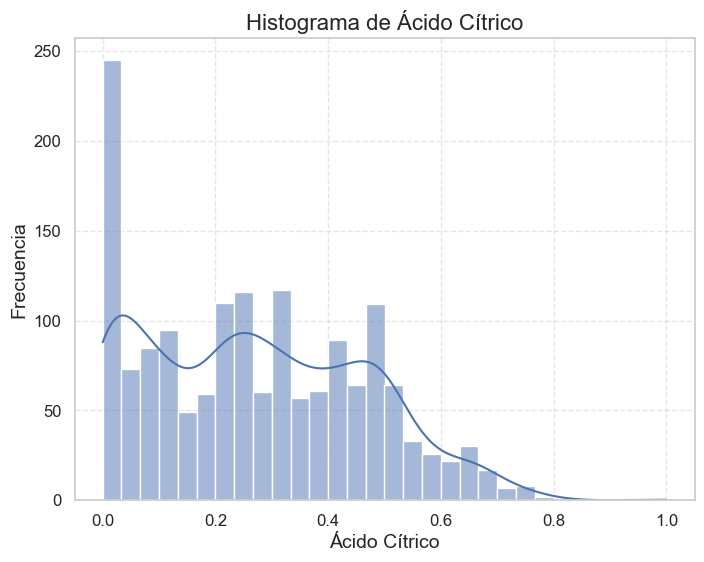

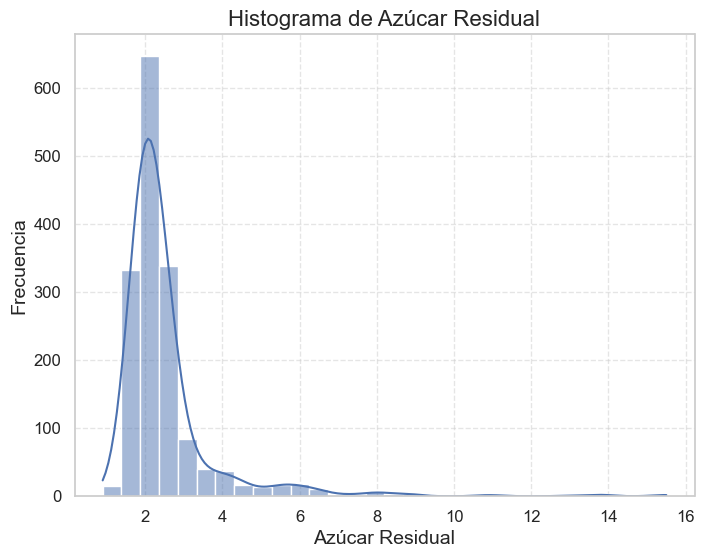

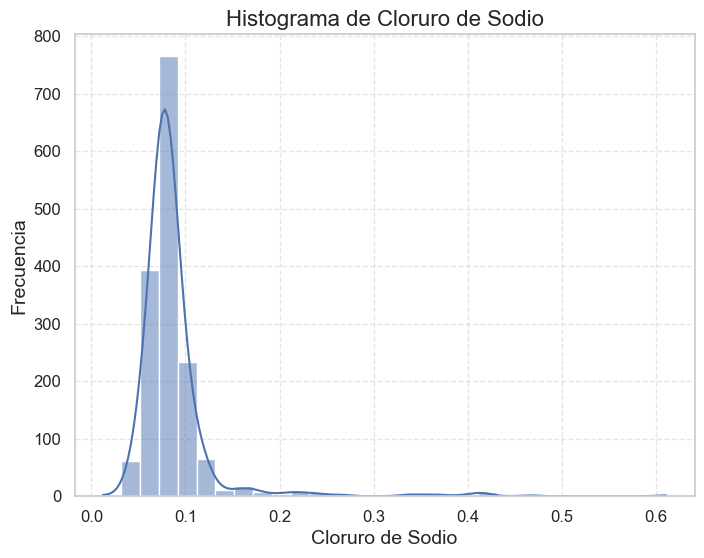

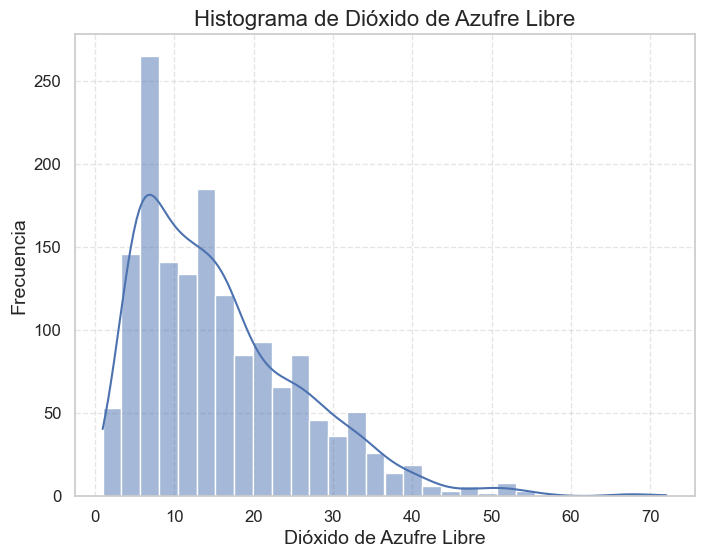

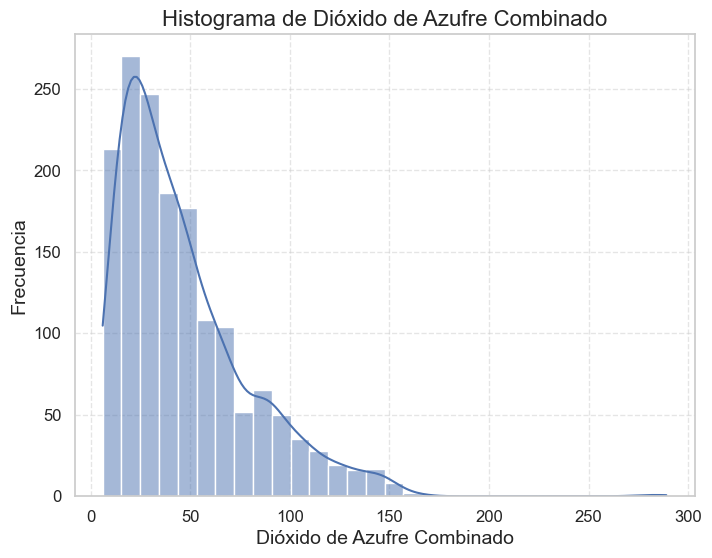

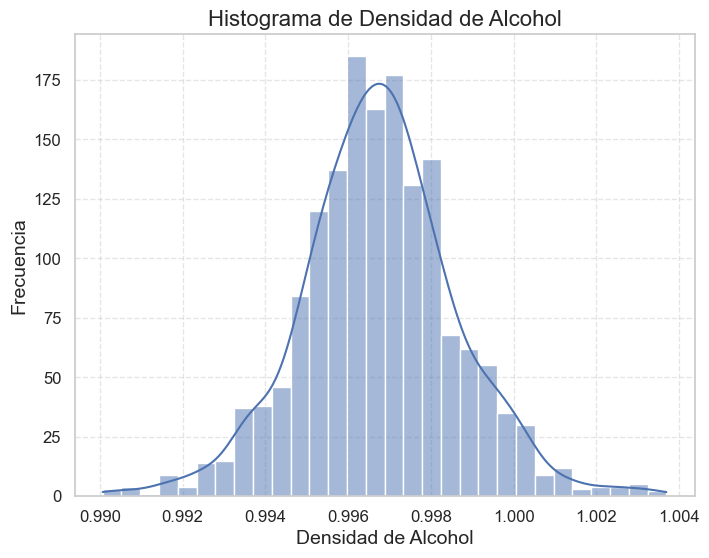

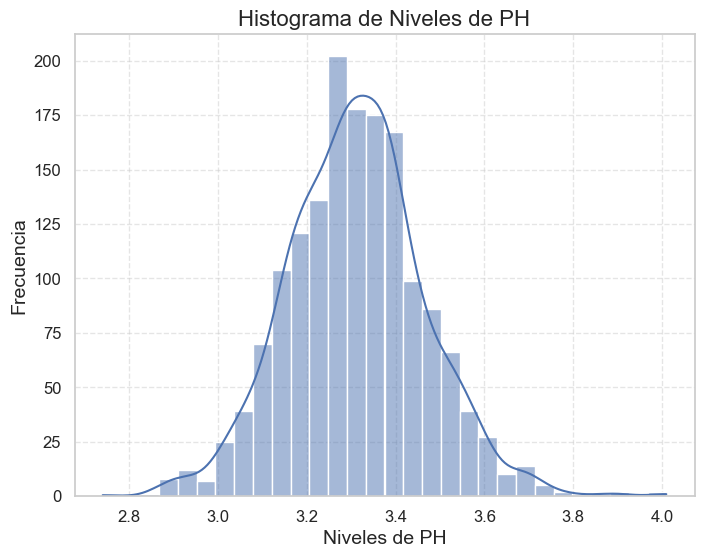

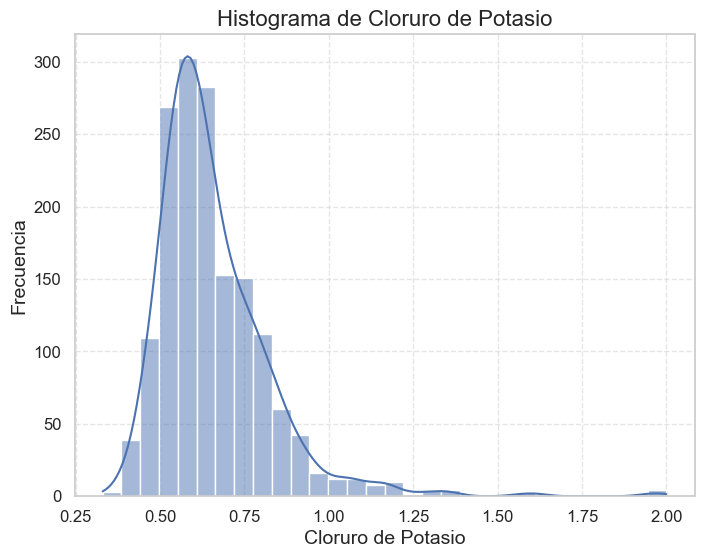

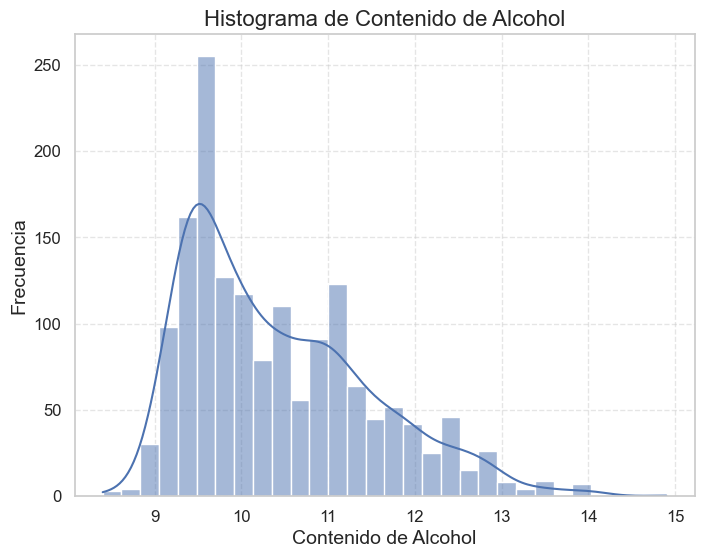

In [14]:

statistics = df[['Ácido Tartárico', 'Densidad de Uva', 'Ácido Cítrico', 'Azúcar Residual',
                 'Cloruro de Sodio', 'Dióxido de Azufre Libre', 'Dióxido de Azufre Combinado',
                 'Densidad de Alcohol', 'Niveles de PH', 'Cloruro de Potasio', 'Contenido de Alcohol']].agg(['mean', 'std', 'min', 'max'])
# Mostrar el resultado
print(statistics)


# Generar histogramas sin el índice
for column in df.columns:
  if column != 'Índice':
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()



Perfil químico del vino:

| Variable                     | Media        | Desviación Estándar | Mínimo | Máximo   |
|------------------------------|--------------|---------------------|--------|----------|
| **Ácido Tartárico**          | 8.32         | 1.74                | 4.60   | 15.90    |
| **Densidad de Uva**         | 0.53         | 0.18                | 0.12   | 1.58     |
| **Ácido Cítrico**            | 0.27         | 0.19                | 0.00   | 1.00     |
| **Azúcar Residual**          | 2.54         | 1.41                | 0.90   | 15.50    |
| **Cloruro de Sodio**         | 0.09         | 0.05                | 0.01   | 0.61     |
| **Dióxido de Azufre Libre**  | 15.87        | 10.46               | 1.00   | 72.00    |
| **Dióxido de Azufre Combinado** | 46.47     | 32.90               | 6.00   | 289.00   |
| **Densidad de Alcohol**      | 0.997        | 0.002               | 0.99   | 1.00     |
| **Niveles de PH**            | 3.31         | 0.15                | 2.74   | 4.01     |
| **Cloruro de Potasio**       | 0.66         | 0.17                | 0.33   | 2.00     |
| **Contenido de Alcohol**      | 10.42        | 1.07                | 8.40   | 14.90    |

## Análisis por Variable

### 1. **Ácido Tartárico**
- **Media:** 8.32 g/L
- **Desviación Estándar:** 1.74
- **Interpretación:** Los niveles de ácido tartárico son bastante variados, con un rango que va desde 4.60 g/L hasta 15.90 g/L. Esto sugiere diferencias significativas en la acidez entre diferentes vinos, lo cual puede afectar su perfil de sabor.

### 2. **Densidad de Uva**
- **Media:** 0.53 g/mL
- **Desviación Estándar:** 0.18
- **Interpretación:** La densidad de uva muestra una buena consistencia, aunque hay una variabilidad notable, con valores que oscilan entre 0.12 y 1.58 g/mL, lo que puede reflejar diferencias en la madurez de la uva.

### 3. **Ácido Cítrico**
- **Media:** 0.27 g/L
- **Desviación Estándar:** 0.19
- **Interpretación:** La presencia de ácido cítrico en el vino es variable, con algunos vinos presentando hasta 1.00 g/L. Esto puede influir en la frescura y el equilibrio del vino.

### 4. **Azúcar Residual**
- **Media:** 2.54 g/L
- **Desviación Estándar:** 1.41
- **Interpretación:** Los niveles de azúcar residual presentan una variabilidad considerable, con un rango que va de 0.90 g/L a 15.50 g/L. Esto es crucial para determinar el perfil de dulzura del vino.

### 5. **Cloruro de Sodio**
- **Media:** 0.09 g/L
- **Desviación Estándar:** 0.05
- **Interpretación:** Los niveles de cloruro de sodio son relativamente constantes, lo que indica un control efectivo durante el proceso de producción.

### 6. **Dióxido de Azufre Libre**
- **Media:** 15.87 mg/L
- **Desviación Estándar:** 10.46
- **Interpretación:** La variabilidad en el dióxido de azufre libre sugiere diferentes prácticas de conservación, que son vitales para la calidad del vino.

### 7. **Dióxido de Azufre Combinado**
- **Media:** 46.47 mg/L
- **Desviación Estándar:** 32.90
- **Interpretación:** La alta variabilidad en los niveles de dióxido de azufre combinado sugiere diferencias en la forma en que se manejan las técnicas de conservación.

### 8. **Densidad de Alcohol**
- **Media:** 0.997 g/mL
- **Desviación Estándar:** 0.002
- **Interpretación:** La densidad de alcohol es bastante uniforme, lo que indica un proceso de fermentación controlado.

### 9. **Niveles de PH**
- **Media:** 3.31
- **Desviación Estándar:** 0.15
- **Interpretación:** Los niveles de pH son relativamente estables, lo que es positivo para la estabilidad y calidad del vino.

### 10. **Cloruro de Potasio**
- **Media:** 0.66 g/L
- **Desviación Estándar:** 0.17
- **Interpretación:** La variabilidad en el cloruro de potasio es moderada, lo que puede afectar el equilibrio general del vino.

### 11. **Contenido de Alcohol**
- **Media:** 10.42%
- **Desviación Estándar:** 1.07
- **Interpretación:** La variabilidad en el contenido de alcohol es significativa, lo que puede influir en la percepción del sabor y el cuerpo del vino.




## Tipos de Vino Producidos

Con base en los análisis de las variables, se pueden identificar varios tipos de vino producidos:

- **Vinos Blancos y Rosados**: Probablemente tengan niveles variados de acidez y frescura, destacando los vinos con mayor ácido tartárico y cítrico.
- **Vinos Tintos**: Con una variabilidad en la densidad de uva, pH y contenido de alcohol, estos vinos pueden tener diferentes perfiles de sabor y cuerpo.
- **Vinos Dulces y Secos**: La variabilidad en el azúcar residual sugiere la producción de vinos tanto dulces como secos.
- **Vinos de Envejecimiento**: Los diferentes niveles de dióxido de azufre libre y combinado indican prácticas de conservación variadas, afectando el potencial de envejecimiento de los vinos.


---
## Análisis de Correlación

In [15]:
# Eliminar la columna 'Unnamed'
dl = df.drop(columns=['Índice'])

In [31]:
correlacion = dl.corr()


correlacion

,Ácido Tartárico,Densidad de Uva,Ácido Cítrico,Azúcar Residual,Cloruro de Sodio,Dióxido de Azufre Libre,Dióxido de Azufre Combinado,Densidad de Alcohol,Niveles de PH,Cloruro de Potasio,Contenido de Alcohol
Ácido Tartárico,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
Densidad de Uva,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
Ácido Cítrico,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
Azúcar Residual,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
Cloruro de Sodio,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
Dióxido de Azufre Libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
Dióxido de Azufre Combinado,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
Densidad de Alcohol,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
Niveles de PH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
Cloruro de Potasio,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595




El análisis de correlación permite entender la relación entre diferentes variables químicas y físicas en el conjunto de datos de producción de vino. A continuación, se presentan las principales observaciones derivadas de la matriz de correlación:

### 1. **Ácido Tartárico**
- **Correlación con Ácido Cítrico:** Positiva alta (0.6717), indicando que a medida que aumenta el ácido tartárico, también lo hace el ácido cítrico.
- **Correlación con Densidad de Uva:** Negativa (-0.2561), lo que sugiere que un aumento en el ácido tartárico está asociado a una disminución en la densidad de la uva.

### 2. **Densidad de Uva**
- **Correlación con Ácido Cítrico:** Negativa (-0.5525), sugiriendo que a mayor densidad de uva, menor es el contenido de ácido cítrico.
- **Correlación con Niveles de PH:** Positiva (0.2349), indicando que un aumento en la densidad de la uva se asocia con niveles de pH más altos.

### 3. **Ácido Cítrico**
- **Correlación con Densidad de Alcohol:** Positiva (0.3649), lo que sugiere que un aumento en el ácido cítrico puede correlacionarse con una mayor densidad de alcohol en el vino.
- **Correlación con Niveles de PH:** Negativa (-0.5419), indicando que mayores niveles de ácido cítrico se asocian con un pH más bajo.

### 4. **Azúcar Residual**
- Las correlaciones con otros compuestos son generalmente bajas, destacando solo una correlación moderada con Dióxido de Azufre Libre (0.1870) y Densidad de Alcohol (0.3553).

### 5. **Dióxido de Azufre Libre y Combinado**
- **Dióxido de Azufre Libre:** Presenta una correlación fuerte con el Dióxido de Azufre Combinado (0.6677), indicando que ambos se comportan de manera similar en el conjunto de datos.
  
### 6. **Densidad de Alcohol**
- **Correlación con Contenido de Alcohol:** Negativa (-0.4962), lo que indica que un aumento en la densidad de alcohol se asocia con una disminución en el contenido total de alcohol.

### 7. **Niveles de PH**
- Presenta correlaciones significativas, como una fuerte relación negativa con Ácido Tartárico (-0.6829) y Ácido Cítrico (-0.5419), sugiriendo que un pH más bajo está relacionado con mayores concentraciones de estos ácidos.

### 8. **Cloruro de Potasio**
- Correlaciones positivas con Ácido Cítrico (0.3128) y Cloruro de Sodio (0.3713), lo que indica que estos compuestos tienden a aumentar juntos en la producción de vino.



----
## Análisis de la Media de Cada Variable


In [17]:
# Calcular la media de las columnas numéricas
media = dl.mean()

print('----------------------')
print('Media de cada variable')
print('----------------------')
print(media)


----------------------
Media de cada variable
----------------------
Ácido Tartárico                 8.319637
Densidad de Uva                 0.527821
Ácido Cítrico                   0.270976
Azúcar Residual                 2.538806
Cloruro de Sodio                0.087467
Dióxido de Azufre Libre        15.874922
Dióxido de Azufre Combinado    46.467792
Densidad de Alcohol             0.996747
Niveles de PH                   3.311113
Cloruro de Potasio              0.658149
Contenido de Alcohol           10.422983
dtype: float64


"El análisis de las medias de las variables indica que el Dióxido de Azufre Combinado tiene una media de 46.467792, que es aproximadamente tres veces mayor que la media del Dióxido de Azufre Libre, que es de 15.874922. Además, la media del Dióxido de Azufre Combinado es aproximadamente 4.46 veces mayor que la media del Contenido de Alcohol, que es de 10.422983."




### 1. **Ácido Tartárico**
- **Media:** 8.32 g/L
- **Interpretación:** Un nivel medio relativamente alto de ácido tartárico sugiere que este componente es significativo en el perfil de sabor del vino, contribuyendo a la acidez y estabilidad.

### 2. **Densidad de Uva**
- **Media:** 0.53 g/mL
- **Interpretación:** La densidad de uva promedio indica una relación adecuada entre el contenido de azúcares y otros componentes en las uvas, lo cual es crucial para la fermentación y el desarrollo del vino.

### 3. **Ácido Cítrico**
- **Media:** 0.27 g/L
- **Interpretación:** Un nivel moderado de ácido cítrico podría contribuir a la frescura y acidez equilibrada del vino, realzando su palatabilidad.

### 4. **Azúcar Residual**
- **Media:** 2.54 g/L
- **Interpretación:** La cantidad promedio de azúcar residual sugiere un vino que podría ser ligeramente dulce, lo que puede atraer a ciertos consumidores y equilibrar la acidez.

### 5. **Cloruro de Sodio**
- **Media:** 0.09 g/L
- **Interpretación:** La baja media de cloruro de sodio indica que este componente es menor, lo que podría influir mínimamente en la percepción de salinidad en el vino.

### 6. **Dióxido de Azufre Libre**
- **Media:** 15.87 mg/L
- **Interpretación:** La cantidad de dióxido de azufre libre es importante para la conservación del vino, protegiendo contra la oxidación y la contaminación microbiana.

### 7. **Dióxido de Azufre Combinado**
- **Media:** 46.47 mg/L
- **Interpretación:** Un nivel medio de dióxido de azufre combinado puede indicar una buena práctica en la gestión de la calidad del vino, asegurando la estabilidad y longevidad.

### 8. **Densidad de Alcohol**
- **Media:** 0.997 g/mL
- **Interpretación:** La densidad de alcohol promedio está en un rango típico para los vinos, sugiriendo un contenido alcohólico equilibrado.

### 9. **Niveles de PH**
- **Media:** 3.31
- **Interpretación:** Un pH medio de 3.31 es favorable, indicando un equilibrio entre acidez y dulzura, lo que puede resultar en un vino bien estructurado.

### 10. **Cloruro de Potasio**
- **Media:** 0.66 g/L
- **Interpretación:** La cantidad promedio de cloruro de potasio sugiere un papel limitado en la influencia del sabor, aunque puede afectar la estabilidad del vino.

### 11. **Contenido de Alcohol**
- **Media:** 10.42%
- **Interpretación:** El contenido de alcohol promedio indica un vino de cuerpo ligero a medio, que puede atraer a un amplio espectro de consumidores.




----
## Análisis de la Varianza de Cada Variable

In [18]:
# Calcular la varianza de las columnas numéricas
varianza = dl.var()

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(varianza)

-------------------------
Varianza de cada variable
-------------------------
Ácido Tartárico                   3.031416
Densidad de Uva                   0.032062
Ácido Cítrico                     0.037947
Azúcar Residual                   1.987897
Cloruro de Sodio                  0.002215
Dióxido de Azufre Libre         109.414884
Dióxido de Azufre Combinado    1082.102373
Densidad de Alcohol               0.000004
Niveles de PH                     0.023835
Cloruro de Potasio                0.028733
Contenido de Alcohol              1.135647
dtype: float64


Si no se estandarizan las variables para que tengan media cero y desviación estándar uno antes de realizar el análisis PCA, las variables con mayor media y dispersión, como Dióxido de Azufre Combinado (1082.102373) y Dióxido de Azufre Libre (109.414884), dominarán la mayoría de las componentes principales.




### 1. **Ácido Tartárico**
- **Varianza:** 3.03
- **Interpretación:** La varianza relativamente alta sugiere que hay una considerable dispersión en los niveles de ácido tartárico entre diferentes muestras, lo que podría influir en la acidez y el perfil de sabor del vino.

### 2. **Densidad de Uva**
- **Varianza:** 0.03
- **Interpretación:** Una varianza baja indica que los valores de densidad de uva son bastante consistentes entre las muestras, lo que puede ser un indicativo de prácticas de cultivo uniformes.

### 3. **Ácido Cítrico**
- **Varianza:** 0.04
- **Interpretación:** Similar a la densidad de uva, la baja varianza en los niveles de ácido cítrico sugiere una homogeneidad en el contenido de este ácido, lo que puede ser ventajoso para mantener la frescura del vino.

### 4. **Azúcar Residual**
- **Varianza:** 1.99
- **Interpretación:** La varianza significativa en el azúcar residual indica variabilidad en la percepción de dulzura entre diferentes vinos, lo que podría atraer a diversos consumidores.

### 5. **Cloruro de Sodio**
- **Varianza:** 0.00
- **Interpretación:** La mínima varianza sugiere que el contenido de cloruro de sodio es bastante constante, indicando un control efectivo en la producción respecto a este componente.

### 6. **Dióxido de Azufre Libre**
- **Varianza:** 109.41
- **Interpretación:** La alta varianza en el dióxido de azufre libre puede indicar diferencias en las técnicas de conservación y en la gestión de la calidad del vino.

### 7. **Dióxido de Azufre Combinado**
- **Varianza:** 1082.10
- **Interpretación:** La varianza extremadamente alta sugiere una gran dispersión en los niveles de dióxido de azufre combinado, lo cual es crítico para la estabilidad del vino, indicando que algunas muestras pueden tener una mayor propensión a la oxidación.

### 8. **Densidad de Alcohol**
- **Varianza:** 0.00
- **Interpretación:** La varianza casi nula indica que la densidad de alcohol es consistentemente baja en las muestras, sugiriendo un control riguroso durante el proceso de fermentación.

### 9. **Niveles de PH**
- **Varianza:** 0.02
- **Interpretación:** La baja varianza en los niveles de pH indica una estabilidad en la acidez del vino, lo cual es deseable para mantener un perfil de sabor atractivo.

### 10. **Cloruro de Potasio**
- **Varianza:** 0.03
- **Interpretación:** Una varianza baja sugiere que el contenido de cloruro de potasio es uniforme en las muestras, lo que podría influir en la estabilidad del vino.

### 11. **Contenido de Alcohol**
- **Varianza:** 1.14
- **Interpretación:** La varianza en el contenido de alcohol indica variabilidad en el nivel alcohólico del vino, lo que podría ser atractivo para diferentes segmentos de mercado.




---
---
### Análisis de Componentes Principales

----


In [19]:
#  PREPROCESAMIENTO DE DATOS
# Eliminar columna innecesaria (en este caso, 'Índice')
df_clean = df.drop(columns=['Índice'])

In [20]:
# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

In [21]:
#  APLICAR PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled )


In [24]:
# Realizar PCA  5 componentes principales
#pca = PCA(n_components=5)  # Especificar que queremos 5 componentes principales
#principal_components = pca.fit_transform(df_scaled )

----

In [22]:
# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

In [23]:
# Añadir la columna 'Índice' al DataFrame de PCA
pca_df = pd.concat([pca_df, df['Índice']], axis=1)
# Reorganizar las columnas para que 'Marca' sea la primera
cols = ['Índice'] + [col for col in pca_df if col != 'Índice']
pca_df = pca_df[cols]

##### Interpretación de las Cargas de las Variables en Cada Componente Principal

In [24]:
# Crear un DataFrame con las cargas de cada variable en cada componente principal
cargas_df = pd.DataFrame(
    data    = pca.components_,
    columns = df_clean.columns,
    index   = [f'PC{i+1}' for i in range(pca.n_components_)]
)

# Mostrar las cargas de las variables
print("Cargas de las variables en cada componente principal:")


Cargas de las variables en cada componente principal:


In [28]:
cargas_df

,Ácido Tartárico,Densidad de Uva,Ácido Cítrico,Azúcar Residual,Cloruro de Sodio,Dióxido de Azufre Libre,Dióxido de Azufre Combinado,Densidad de Alcohol,Niveles de PH,Cloruro de Potasio,Contenido de Alcohol
PC1,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
PC2,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
PC3,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
PC4,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
PC5,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
PC6,-0.101479,-0.411449,-0.069593,-0.049156,-0.304339,0.014000,-0.136308,0.391152,0.522116,0.381263,-0.361645
PC7,0.350227,0.533735,-0.105497,-0.290663,-0.370413,0.116596,0.093662,0.170481,0.025138,0.447469,0.327651
PC8,0.177595,0.078775,0.377516,-0.299845,0.357009,0.204781,-0.019036,0.239223,0.561391,-0.374604,0.217626
PC9,0.194021,-0.129110,-0.381450,0.007523,0.111339,0.635405,-0.592116,0.020719,-0.167746,-0.058367,0.037603
PC10,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015



# Interpretación de las Cargas de las Variables en Cada Componente Principal

Las cargas de las variables en cada componente principal en un Análisis de Componentes Principales (PCA) indican la contribución de cada variable original a los nuevos componentes principales. Vamos a interpretar esta tabla:

## Componente Principal 1 (PC1):
- **Ácido Tartárico (0.489)**: Alta carga positiva, contribuye significativamente.
- **Ácido Cítrico (0.464)**: Alta carga positiva, contribuye significativamente.
- **Densidad de Alcohol (0.395)**: Alta carga positiva, contribuye significativamente.
- **Niveles de pH (-0.439)**: Alta carga negativa, contribuye significativamente.
- **Cloruro de Sodio (0.212)**: Moderada carga positiva.
- **Densidad de Uva (-0.239)**: Moderada carga negativa.

## Componente Principal 2 (PC2):
- **Dióxido de Azufre Libre (0.514)**: Alta carga positiva, contribuye significativamente.
- **Dióxido de Azufre Combinado (0.569)**: Alta carga positiva, contribuye significativamente.
- **Contenido de Alcohol (-0.386)**: Moderada carga negativa, contribuye significativamente.

## Componente Principal 3 (PC3):
- **Contenido de Alcohol (0.472)**: Alta carga positiva, contribuye significativamente.
- **Densidad de Alcohol (-0.339)**: Alta carga negativa, contribuye significativamente.
- **Densidad de Uva (-0.450)**: Alta carga negativa, contribuye significativamente.

## Componente Principal 4 (PC4):
- **Cloruro de Sodio (0.666)**: Alta carga positiva, contribuye significativamente.
- **Cloruro de Potasio (0.551)**: Alta carga positiva, contribuye significativamente.
- **Azúcar Residual (-0.373)**: Moderada carga negativa.

## Componente Principal 5 (PC5):
- **Azúcar Residual (0.732)**: Alta carga positiva, contribuye significativamente.
- **Contenido de Alcohol (0.351)**: Moderada carga positiva.

## Componente Principal 6 (PC6):
- **Densidad de Uva (-0.411)**: Alta carga negativa.
- **Niveles de pH (0.522)**: Alta carga positiva.
- **Cloruro de Potasio (0.381)**: Moderada carga positiva.
- **Contenido de Alcohol (-0.362)**: Moderada carga negativa.

## Componente Principal 7 (PC7):
- **Densidad de Uva (0.534)**: Alta carga positiva.
- **Ácido Tartárico (0.350)**: Moderada carga positiva.
- **Cloruro de Potasio (0.447)**: Moderada carga positiva.

## Componente Principal 8 (PC8):
- **Niveles de pH (0.561)**: Alta carga positiva.
- **Ácido Cítrico (0.378)**: Moderada carga positiva.

## Componente Principal 9 (PC9):
- **Dióxido de Azufre Libre (0.635)**: Alta carga positiva.
- **Dióxido de Azufre Combinado (-0.592)**: Alta carga negativa.

## Componente Principal 10 (PC10):
- **Ácido Cítrico (0.622)**: Alta carga positiva.
- **Densidad de Uva (0.366)**: Moderada carga positiva.

## Componente Principal 11 (PC11):
- **Ácido Tartárico (0.640)**: Alta carga positiva.
- **Densidad de Alcohol (-0.567)**: Alta carga negativa.

## Interpretación General:
- **PC1** parece estar fuertemente influenciado por variables químicas como los ácidos y la densidad de alcohol, con una diferenciación significativa de pH.
- **PC2** está principalmente influenciado por las concentraciones de dióxido de azufre y el contenido de alcohol.
- **PC3** también está influenciado por el contenido de alcohol y la densidad de uva.
- **PC4 y PC5** muestran influencias fuertes de cloruros y azúcar residual.
- **Otros componentes (PC6-PC11)** tienen contribuciones significativas de varias combinaciones de las variables originales, indicando la complejidad y la multi-dimensionalidad de los datos.





---

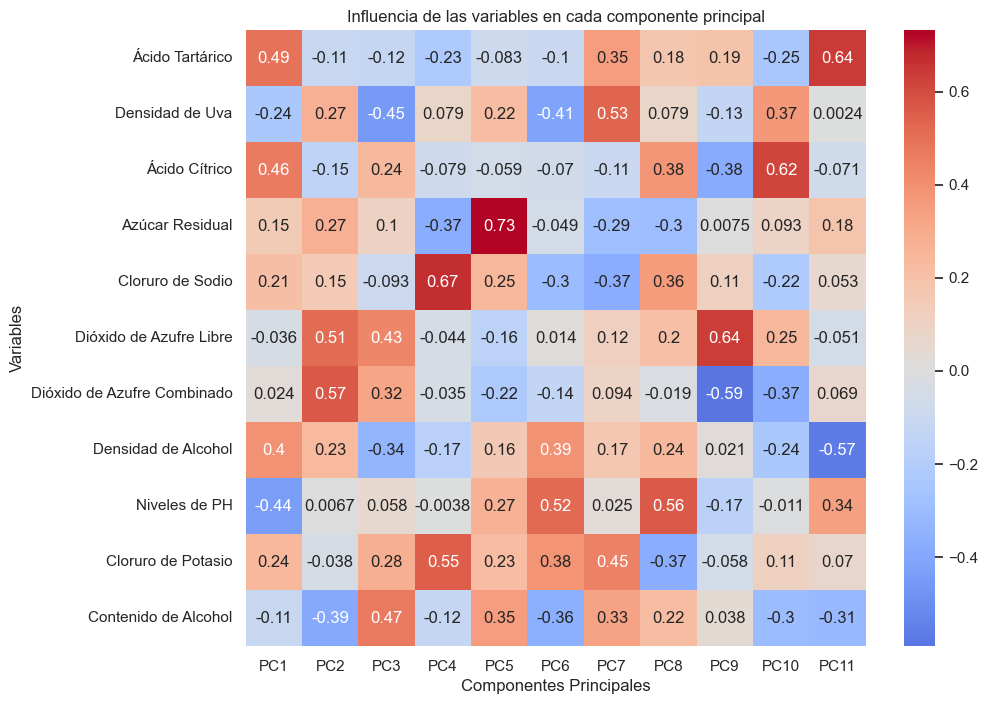

In [25]:
cargas_df_transposed = cargas_df.transpose()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cargas_df_transposed, annot=True, cmap='coolwarm', center=0)
plt.title('Influencia de las variables en cada componente principal')
plt.ylabel('Variables')  # Ahora las variables van en el eje y
plt.xlabel('Componentes Principales')  # Ahora los componentes principales van en el eje x
plt.show()


## Análisis del Heatmap de Componentes Principales

Este gráfico de calor muestra la influencia de diferentes variables químicas en cada uno de los 11 componentes principales (PCs) de un análisis de componentes principales (PCA). A continuación se desglosa el análisis en dos partes:
* (1) **Identificación de las variables más influyentes en cada componente** y
* (2) **Interpretación general de patrones entre las variables**.

## 1. Identificación de las variables más influyentes por componente principal

### PC1:
- Las variables con mayor influencia positiva son:
  - **Ácido Tartárico** (0.49)
  - **Ácido Cítrico** (0.46)
  - **Densidad de Alcohol** (0.40)
- Por otro lado, el **Nivel de PH** (-0.44) tiene una influencia negativa significativa.

### PC2:
- Las variables más influyentes positivamente son:
  - **Dióxido de Azufre Combinado** (0.57)
  - **Cloruro de Sodio** (0.51)
  - **Densidad de Uva** (0.27)
- **Contenido de Alcohol** (-0.39) y **Ácido Cítrico** (-0.15) son las más influyentes negativamente.

### PC3:
- Las principales variables con mayor influencia son:
  - **Contenido de Alcohol** (0.47)
  - **Dióxido de Azufre Libre** (0.43)
  - **Dióxido de Azufre Combinado** (0.32)
- **Densidad de Alcohol** (-0.34) y **Densidad de Uva** (-0.45) influyen negativamente.

### PC4:
- **Azúcar Residual** (0.73) es claramente la variable más influyente en este componente, seguida por **Cloruro de Sodio** (0.67).
- Otras variables como **Cloruro de Potasio** (0.55) y **Contenido de Alcohol** (0.35) también tienen una influencia positiva considerable.

### PC5:
- **Dióxido de Azufre Libre** (0.64) tiene la mayor carga positiva, mientras que el **Ácido Tartárico** (-0.23) y el **Nivel de PH** (-0.27) son menos influyentes pero en dirección negativa.

### PC6:
- **Niveles de PH** (0.52) y **Densidad de Uva** (0.41) muestran una influencia positiva, mientras que el **Ácido Tartárico** (-0.23) y el **Cloruro de Sodio** (-0.30) tienen una influencia negativa.

### PC7:
- **Ácido Cítrico** (0.38) y **Dióxido de Azufre Libre** (0.20) son los más influyentes positivamente, mientras que el **Cloruro de Potasio** (-0.37) muestra una influencia negativa.

### PC8:
- La variable más influyente es el **Dióxido de Azufre Libre** (0.64), seguida por el **Cloruro de Sodio** (0.36).
- **Dióxido de Azufre Combinado** (-0.59) tiene una fuerte influencia negativa.

### PC9:
- **Ácido Tartárico** (0.64) y **Densidad de Uva** (0.37) son las variables más influyentes, mientras que el **Dióxido de Azufre Combinado** (-0.37) tiene un efecto negativo.

### PC10:
- Las influencias positivas más fuertes son **Dióxido de Azufre Libre** (0.25) y **Niveles de PH** (0.56), mientras que **Densidad de Alcohol** (-0.24) y **Cloruro de Sodio** (-0.22) tienen efectos negativos.

### PC11:
- El **Ácido Tartárico** (-0.64) tiene la mayor influencia, pero es negativa. Esto sugiere que esta variable disminuye su importancia en este componente. **Densidad de Alcohol** (-0.57) también es relevante negativamente.
- **Niveles de PH** (0.34) y **Cloruro de Sodio** (0.22) tienen influencias positivas menores.

## 2. Interpretación general de patrones

- **Variables recurrentes con influencia fuerte**: Algunas variables muestran influencias significativas a lo largo de varios componentes, como el **Ácido Tartárico**, **Azúcar Residual**, **Cloruro de Sodio**, y el **Contenido de Alcohol**. Esto indica que son variables clave en la diferenciación de los componentes principales.
  
- **Ácido Tartárico**: Aunque tiene una fuerte influencia positiva en PC1, en PC11 tiene una influencia negativa muy alta (-0.64). Esto sugiere que esta variable es relevante para explicar tanto aspectos comunes como particulares en la variabilidad del conjunto de datos.

- **Azúcar Residual**: Tiene una influencia fuerte y positiva en PC4 (0.73), lo que indica que este componente se centra principalmente en la variabilidad del azúcar residual. Esta variable es crítica en la diferenciación de este componente respecto a otros.

- **Dióxido de Azufre Libre y Combinado**: Estas variables juegan un rol importante en varios componentes, en particular en PC5, PC8 y PC2. Suelen estar relacionadas con la preservación y la calidad de productos como el vino, por lo que su influencia en la variabilidad de estos datos es esperada.

- **Niveles de PH**: A pesar de que tiene valores negativos en algunos componentes (PC1), su influencia es positiva en otros (PC10, PC6), indicando que puede tener efectos diversos sobre la estructura subyacente de los datos.







----
#### Gráfico de porcentaje de varianza explicada por cada componente:

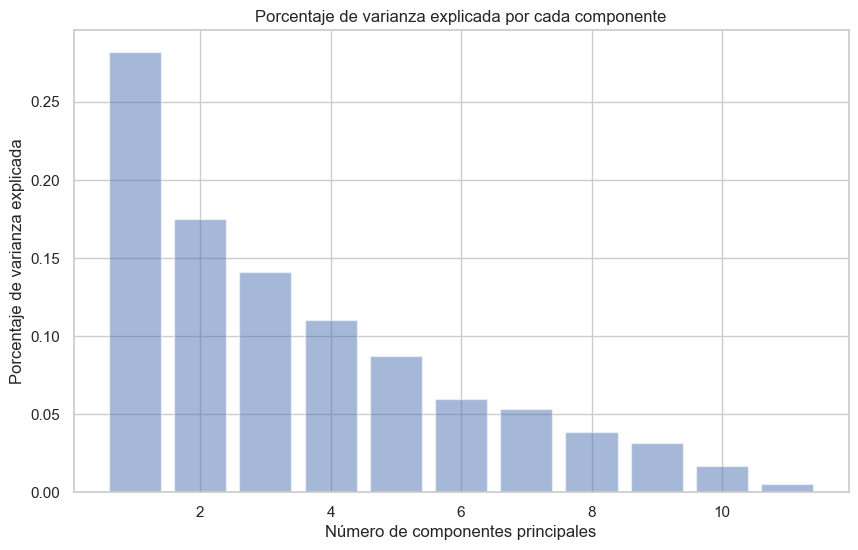

In [26]:
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()


# Análisis del Porcentaje de Varianza Explicada por Cada Componente Principal



### Componente Principal 1 (PC1):
- El **PC1** es el que más varianza explica, aproximadamente un **26%** de la variabilidad total en los datos. Esto significa que la primera dimensión o eje capturado por el PCA contiene la mayor parte de la información de los datos originales.

### Componente Principal 2 (PC2):
- El **PC2** explica alrededor del **18%** de la varianza total. Junto con el **PC1**, estos dos componentes cubren una proporción considerable de la variabilidad total, sumando alrededor del **44%**.

### Componente Principal 3 (PC3):
- El **PC3** explica aproximadamente un **13%** de la varianza. Sumando los tres primeros componentes, se explica más del **57%** de la variabilidad en los datos.

### Componentes subsiguientes (PC4 a PC11):
- A medida que aumenta el número de componentes, el porcentaje de varianza explicada disminuye progresivamente. Los componentes a partir del **PC5** explican una cantidad significativamente menor de la variabilidad, lo que indica que capturan detalles más finos o específicos de los datos.

## Conclusión
- **Los primeros 3 a 5 componentes principales** explican la mayor parte de la varianza en los datos. Esto sugiere que podrían ser suficientes para obtener una representación aproximada de los datos originales, pero en menos dimensiones.
- Los componentes restantes explican cantidades decrecientes de varianza y, aunque contienen información, no son tan influyentes como los primeros en la explicación global de los datos.


----
#### Gráfico de porcentaje de varianza explicada acumulada:

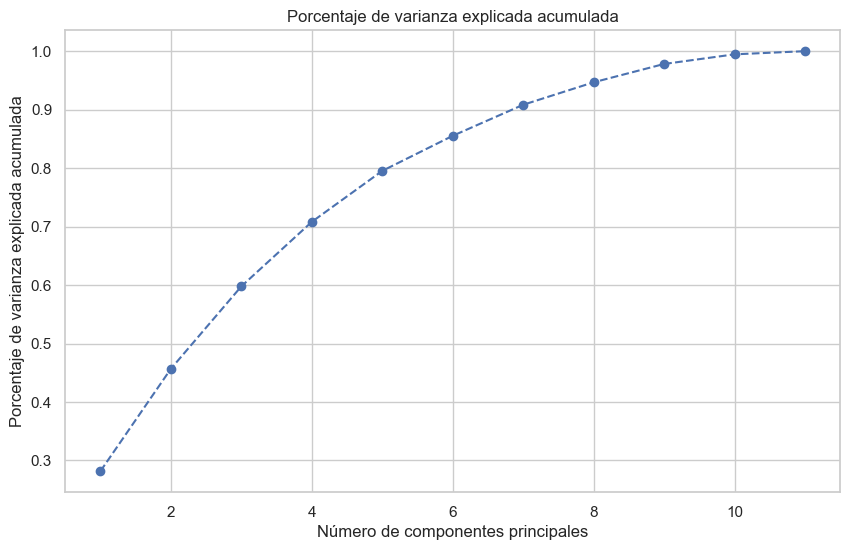

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.title('Porcentaje de varianza explicada acumulada')
plt.show()


# Análisis del Porcentaje de Varianza Explicada Acumulada



### Curva Creciente:
- A medida que se añaden más componentes principales, el porcentaje de varianza explicada acumulada aumenta. Esto refleja que más componentes capturan una mayor parte de la variabilidad total de los datos.

### Primeros Componentes:
- Los primeros **3 a 5 componentes principales** explican una gran parte de la varianza. Por ejemplo, aproximadamente el **60%** de la varianza acumulada se explica con los primeros 3 componentes, y más del **80%** con los primeros 5 componentes.

### Punto de Inflexión:
- Después del componente **6 o 7**, el incremento en la varianza explicada acumulada comienza a disminuir. Esto indica que los componentes adicionales aportan menos información significativa para explicar la variabilidad total.

### Últimos Componentes:
- A partir de los componentes **9 y 10**, la varianza acumulada se estabiliza cerca del **100%**, lo que significa que casi toda la variabilidad de los datos originales ha sido capturada.

## Conclusión
- Los primeros **5 componentes principales** son suficientes para explicar aproximadamente el **80%** de la variabilidad en los datos, sugiriendo que capturan la mayor parte de la información relevante.
- Los componentes adicionales después del componente **7** explican una fracción significativamente menor de la varianza, por lo que podrían omitirse en algunos casos para simplificar el análisis sin perder demasiada información relevante.





In [28]:
# Aplicar PCA con 5 componentes principales
pca = PCA(n_components=4)
proyecciones = pca.fit_transform(df_scaled)

# Crear un DataFrame con las proyecciones
pca5_df = pd.DataFrame(
    data = proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index = df.index
)

# Mostrar las primeras filas del DataFrame resultante
print(pca5_df.head())

        PC1       PC2       PC3       PC4
0 -1.619530  0.450950 -1.774454  0.043740
1 -0.799170  1.856553 -0.911690  0.548066
2 -0.748479  0.882039 -1.171394  0.411021
3  2.357673 -0.269976  0.243489 -0.928450
4 -1.619530  0.450950 -1.774454  0.043740


In [29]:
pca5_df

,PC1,PC2,PC3,PC4
0,-1.619530,0.450950,-1.774454,0.043740
1,-0.799170,1.856553,-0.911690,0.548066
2,-0.748479,0.882039,-1.171394,0.411021
3,2.357673,-0.269976,0.243489,-0.928450
4,-1.619530,0.450950,-1.774454,0.043740
...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687
1595,-2.214496,0.893101,1.807402,0.414003
1596,-1.456129,0.311746,1.124239,0.491877
1597,-2.270518,0.979791,0.627965,0.639770
